In [125]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pylab as pylab
import matplotlib.dates as mdates
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from time import time

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

from scipy import stats
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\craut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
BB = pd.read_csv("../data/Hot Stuff.csv")
low = lambda s: s.lower()
BB["song"] = [s.lower() for s in BB["Song"]]
BB["artist"] = [s.lower() for s in BB["Performer"]]
BB["timestep"] = pd.to_datetime(BB["WeekID"])
BB = BB.sort_values("timestep")
BB.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,song,artist,timestep
5037,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,48,Return To Me,Dean Martin,Return To MeDean Martin,1,NaN,48,1,return to me,dean martin,1958-08-02
10546,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,70,Don't Go Home,The Playmates,Don't Go HomeThe Playmates,1,NaN,70,1,don't go home,the playmates,1958-08-02
3986,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,8,My True Love,Jack Scott,My True LoveJack Scott,1,NaN,8,1,my true love,jack scott,1958-08-02
13350,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,41,Early In The Morning,Buddy Holly,Early In The MorningBuddy Holly,1,NaN,41,1,early in the morning,buddy holly,1958-08-02
68116,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,90,Stay,The Ames Brothers,StayThe Ames Brothers,1,NaN,90,1,stay,the ames brothers,1958-08-02


In [4]:
lyrics_data = pickle.load(open("../dataClustering/df_concat.pickle","rb"))
print(lyrics_data.shape)
lyrics_data.head()

(22708, 16)


,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [15]:
empty_triple = lambda : [0]*3
sa_map = defaultdict(empty_triple)
data_sources = ["genius","az_lyrics","lyrics_az"]
for i,r in lyrics_data.iterrows():
    sa_map[(r["song"],r["artist"])] = [bool(r["{}_raw".format(ds)]) for ds in data_sources]
print(len(sa_map))

22708


In [14]:
sa_map[("saturday morning confusion","bobby russell")]


2

In [18]:
data_ls = []
cols = ["timestep","BB cnts","Genius cnts","AZLyrics cnts","Lyrics.az cnts","all 3 cnts"]
vec_add = lambda u,v: [e1+e2 for e1,e2 in zip(u,v)]
for date in pd.unique(BB.timestep):
    BB_week = BB[BB.timestep == date]
    data_row = [date,len(BB_week)]
    ds_cnts = [0,0,0]
    week_tot = 0
    for i,r in BB_week.iterrows():
        ds_cnts = vec_add(ds_cnts,sa_map[(r["song"],r["artist"])])
        week_tot+=any(sa_map[(r["song"],r["artist"])])
    data_row += ds_cnts+[week_tot]
    data_ls.append(data_row)

cnts_df = pd.DataFrame(data_ls,columns=cols)
print(cnts_df.shape)
cnts_df.head()

(3153, 6)


,timestep,BB cnts,Genius cnts,AZLyrics cnts,Lyrics.az cnts,all 3 cnts
0,1958-08-02,100,65,27,59,75
1,1958-08-09,100,66,32,61,79
2,1958-08-16,100,60,24,53,70
3,1958-08-23,100,59,26,53,71
4,1958-08-30,100,52,22,47,65


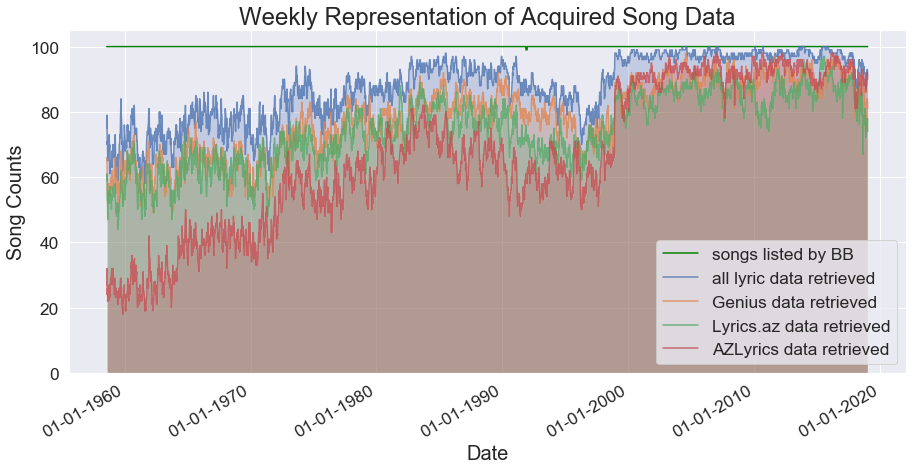

In [31]:

fig, ax = plt.subplots()
ax = sns.lineplot(x=cnts_df["timestep"],y=cnts_df["BB cnts"],color="green",label="songs listed by BB")
ax = sns.lineplot(x=cnts_df["timestep"],y=cnts_df["all 3 cnts"],label="all lyric data retrieved",alpha=0.8)
ax.fill_between(cnts_df["timestep"],0,cnts_df["all 3 cnts"],alpha=0.25)
ax = sns.lineplot(x=cnts_df["timestep"],y=cnts_df["Genius cnts"],label="Genius data retrieved",alpha=0.8)
ax.fill_between(cnts_df["timestep"],0,cnts_df["Genius cnts"],alpha=0.25)
ax = sns.lineplot(x=cnts_df["timestep"],y=cnts_df["Lyrics.az cnts"],label="Lyrics.az data retrieved",alpha=0.8)
ax.fill_between(cnts_df["timestep"],0,cnts_df["Lyrics.az cnts"],alpha=0.25)
ax = sns.lineplot(x=cnts_df["timestep"],y=cnts_df["AZLyrics cnts"],label="AZLyrics data retrieved",alpha=0.8)
ax.fill_between(cnts_df["timestep"],0,cnts_df["AZLyrics cnts"],alpha=0.25)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylabel("Song Counts",fontsize=20)
ax.set_title("Weekly Representation of Acquired Song Data",fontsize=24)
ax.set_ylim(0,105)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

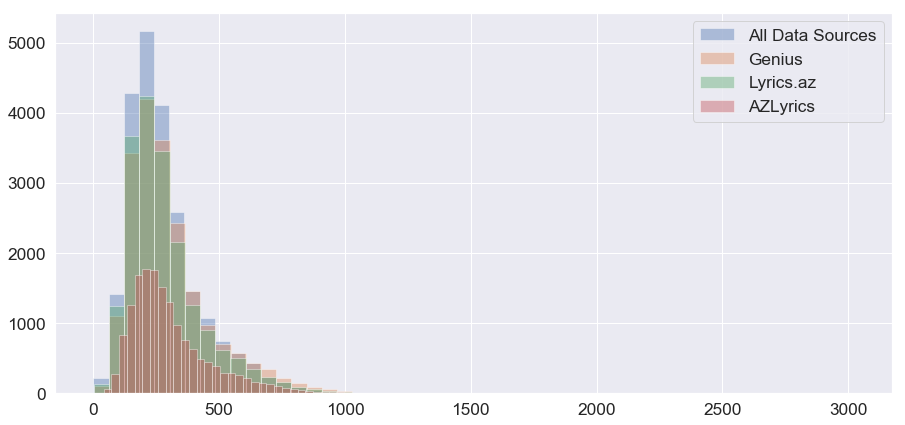

In [60]:
fig, ax = plt.subplots()

ax = sns.distplot([int(sum(v for v in bag.values() if not np.isnan(v))) for bag in lyrics_data["word_intersect_counter"]],kde=False,label="All Data Sources")
ax = sns.distplot([len(bag) for bag in lyrics_data["genius_bag"] if bag],kde=False,label="Genius")
ax = sns.distplot([len(bag) for bag in lyrics_data["lyrics_az_bag"] if bag],kde=False,label="Lyrics.az")
ax = sns.distplot([len(bag) for bag in lyrics_data["az_lyrics_bag"] if bag],kde=False,label="AZLyrics")
ax.legend()
plt.show()

In [64]:
print(stats.describe([int(sum(v for v in bag.values() if not np.isnan(v))) for bag in lyrics_data["word_intersect_counter"]]))
print(stats.describe([len(bag) for bag in lyrics_data["word_intersect_counter"]]))

DescribeResult(nobs=22708, minmax=(0, 3017), mean=281.6864100757442, variance=23867.4943376998, skewness=1.8353165849237731, kurtosis=8.551293853486914)
DescribeResult(nobs=22708, minmax=(1, 799), mean=93.76378368856791, variance=2345.2718076234414, skewness=2.081944951289599, kurtosis=8.036452467160197)


In [91]:
vocab = pickle.load(open("../dataClustering/bag_of_words_concat.pickle","rb"))
print(vocab.shape)
vocab.head()

(39300, 3)


,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


In [92]:
sum(vocab["songcount"]<10)/len(vocab)*100

82.98727735368956

In [94]:
words = [r for i,r in vocab.iterrows() if r["word"] not in stop_words and r["songcount"] >= 10]
words = pd.DataFrame(words)
print(len(words))
words.head()

6686


,word,songcount,wordcount
4,robe,12,19
7,soil,11,12
8,tightly,22,32
10,taxi,50,71
13,beat,1650,3577


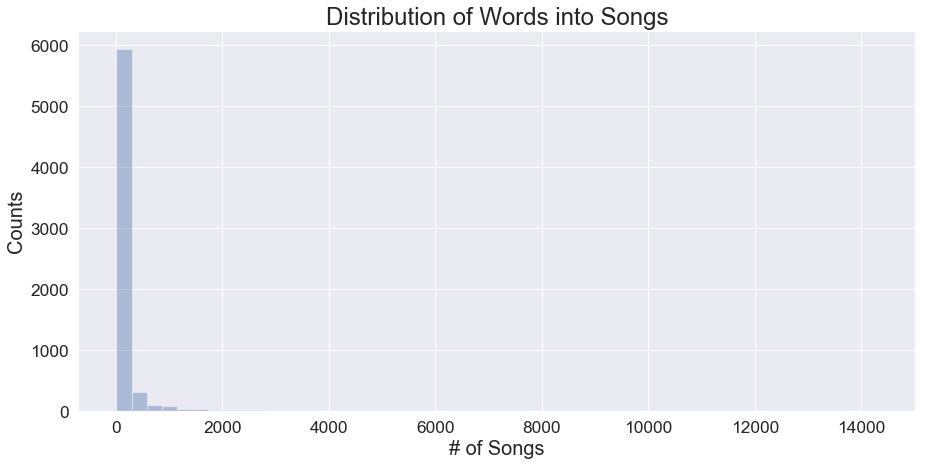

In [102]:
f,ax = plt.subplots()
ax = sns.distplot(words.songcount,kde=False)
ax.set_ylabel("Counts",fontsize=20)
ax.set_xlabel("# of Songs",fontsize=20)
ax.set_title("Distribution of Words into Songs",fontsize=24)
plt.show()

In [111]:
econ_master = pd.read_csv("../data/Econ/EconOriginal/econ_master.csv")
econ_master["DATE"] = pd.to_datetime(econ_master.DATE)
print(econ_master.shape)
econ_master

(624, 13)


,Unnamed: 0,DATE,MonthID,S&P,S&P_detrended,Unemp,Unemp_detrended,Food&Beverage,Food&Beverage_detrended,GDP,GDP_detrended,Income,Income_detrended
0,0,1967-02-01,23606,86.779999,0.169998,3.8,-0.1,34.700,-0.100,4536.517333,NaN,3170.2,6.2
1,1,1967-03-01,23607,90.199997,3.419998,3.8,0.0,34.700,0.000,4537.443667,0.926333,3194.0,23.8
2,2,1967-04-01,23608,94.010002,3.810005,3.8,0.0,34.600,-0.100,4538.370000,0.926333,3193.0,-1.0
3,3,1967-05-01,23609,89.080002,-4.930000,3.8,0.0,34.600,0.000,4552.683000,14.313000,3199.5,6.5
4,4,1967-06-01,23610,90.639999,1.559997,3.9,0.1,34.900,0.300,4566.996000,14.313000,3211.3,11.8
5,5,1967-07-01,23611,94.750000,4.110001,3.8,-0.1,35.000,0.100,4581.309000,14.313000,3224.1,12.8
6,6,1967-08-01,23612,93.639999,-1.110001,3.8,0.0,35.200,0.200,4592.823667,11.514667,3235.7,11.6
7,7,1967-09-01,23613,96.709999,3.070000,3.8,0.0,35.200,0.000,4604.338333,11.514667,3235.3,-0.4
8,8,1967-10-01,23614,93.300003,-3.409996,4.0,0.2,35.300,0.100,4615.853000,11.514667,3240.3,5.0
9,9,1967-11-01,23615,94.000000,0.699997,3.9,-0.1,35.400,0.100,4647.233000,31.380000,3259.9,19.6


<Figure size 1080x1440 with 0 Axes>

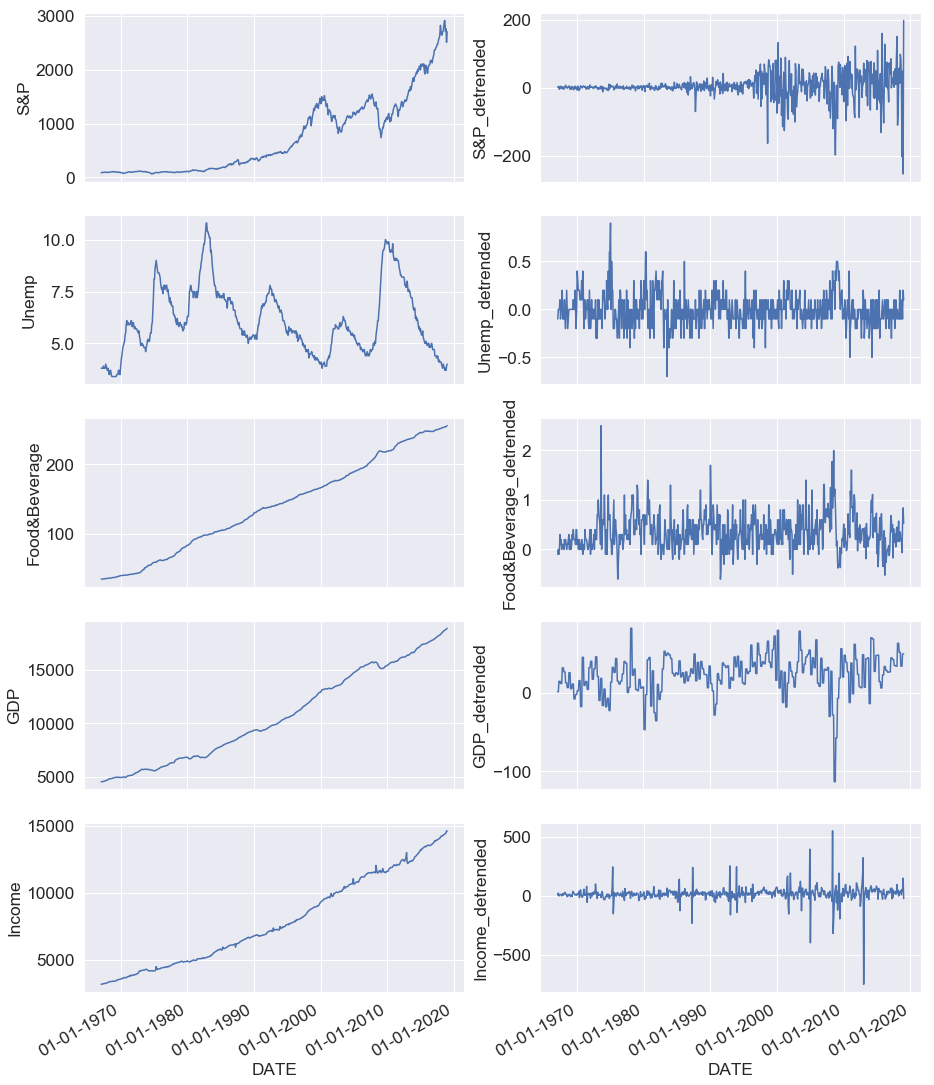

In [124]:
plt.clf()
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
econ_vars = ["S&P","Unemp","Food&Beverage","GDP","Income"]
f,axs = plt.subplots(5,2)
for i,econ in enumerate(econ_vars):
    sns.lineplot(x=econ_master["DATE"],y=econ_master[econ],ax=axs[i][0])
    axs[i][0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
    sns.lineplot(x=econ_master["DATE"],y=econ_master["{}_detrended".format(econ)],ax=axs[i][1])
    axs[i][1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

# put the labels at 45deg since they tend to be too long
f.autofmt_xdate()
#f.suptitle("Behavior of Economic Variables over Time",fontsize=24)
plt.show()

In [128]:
texts = pickle.load(open("../dataClustering/texts.pickle","rb"))
big_bow = defaultdict(int)
for text in texts:
    for w in text:
        if w not in stop_words:
            big_bow[w]+=1
print(len(big_bow))
print(sorted([(big_bow[k],k) for k in big_bow],reverse=True)[:10])

6686
[(179241, 'get'), (167536, 'love'), (156872, "i'm"), (127763, 'know'), (108106, 'like'), (106140, 'go'), (94136, 'oh'), (90000, 'baby'), (82978, 'yeah'), (80561, 'say')]


In [131]:
def pretty_wordcloud(freq):
    wc = WordCloud(background_color='white',width=900,height=500, max_words=500,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Word Cloud of All Lyrics",fontsize=32)
    plt.axis("off")
    plt.show()

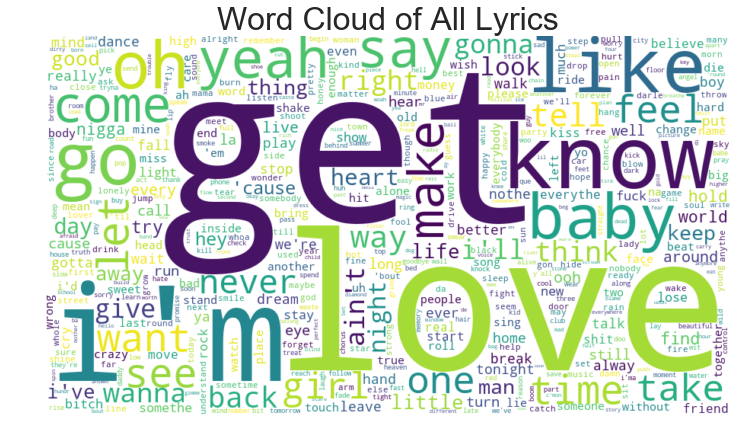

In [132]:
pretty_wordcloud(big_bow)

In [133]:
lyrics_data.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [136]:
big_BB=BB.merge(lyrics_data,left_on=["song","artist"],right_on=["song","artist"],how="inner")[["song","artist","timestep","word_intersect_counter"]]
print(big_BB.shape)
big_BB.head()

(276397, 4)


,song,artist,timestep,word_intersect_counter
0,return to me,dean martin,1958-08-02,"{'will': 1.0, 'home': 4.0, 'lip': 1.0, 'ti': 1..."
1,return to me,dean martin,1958-08-09,"{'will': 1.0, 'home': 4.0, 'lip': 1.0, 'ti': 1..."
2,return to me,dean martin,1958-08-16,"{'will': 1.0, 'home': 4.0, 'lip': 1.0, 'ti': 1..."
3,return to me,dean martin,1958-08-23,"{'will': 1.0, 'home': 4.0, 'lip': 1.0, 'ti': 1..."
4,don't go home,the playmates,1958-08-02,"{'have': 4.0, 'home': 16.0, 'can': 4.0, 'you'd..."


In [148]:
big_BB_cnts = big_BB.groupby(["song","artist"]).size().reset_index(name='counts')
big_BB_cnts = big_BB_cnts.sort_values("counts",ascending=False)
print(big_BB_cnts.shape)
big_BB_cnts.head()

(22708, 3)


,song,artist,counts
15055,radioactive,imagine dragons,87
15832,sail,awolnation,79
9387,i'm yours,jason mraz,76
7882,how do i live,leann rimes,69
3563,counting stars,onerepublic,68


In [159]:
sa_dict = {(r["song"],r["artist"]):r["word_intersect_counter"] for i,r in lyrics_data.iterrows()}
for i,r in big_BB_cnts.iloc[:5][["song","artist"]].iterrows():
    #print(sa_dict[(r["song"],r["artist"])])
    tmp = sorted([(f,w) for w,f in sa_dict[(r["song"],r["artist"])].items() if w not in stop_words],reverse=True)
    print("{"+", ".join("{}:{}".format(w,int(f)) for f,w in tmp[:5])+" ... }")

{whoa:15, i'm:13, radioactive:12, new:12, age:12 ... }
{sail:22, la:22, blame:5, maybe:4, baby:4 ... }
{love:9, i'm:9, oh:4, thi:4, open:4 ... }
{ever:12, without:11, live:9, baby:7, would:6 ... }
{i've:34, count:15, we'll:11, thing:11, burn:10 ... }
